## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata_df,study_results_df, on="Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
combined_df['Mouse ID'].count()

1893

In [3]:
combined_df[['Mouse ID','Timepoint']].head(10)

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
5,k403,25
6,k403,30
7,k403,35
8,k403,40
9,k403,45


In [4]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
combined_df.duplicated(subset=['Mouse ID','Timepoint']).head()


0    False
1    False
2    False
3    False
4    False
dtype: bool

In [5]:
# Drop any duplicate rows
combined_df2 = combined_df.drop_duplicates(keep = 'first')
combined_df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Recheck the number of mice
combined_df2['Mouse ID'].count()

1892

In [7]:
#Setting new column names as the original took long to type in new DF
combined_df2.columns = ['mouse_id','drug','sex','age','weight','time','tumor','meta']
combined_df2

,mouse_id,drug,sex,age,weight,time,tumor,meta
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each drug.

#Get the Mean of all the drugs
mean = combined_df2.groupby('drug').mean()['tumor']
#Get the Median of all the drugs
median = combined_df2.groupby('drug').median()['tumor']
#Get the Variance of all the drugs
variance = combined_df2.groupby('drug').var()['tumor']
#Get the Standard Deviation of all the drugs
std_dev = combined_df2.groupby('drug').std()['tumor']
#Get the SEM of all the drugs
sem = combined_df2.groupby('drug').sem()['tumor']

#Create the DF to store all the calculated variables into a new DF summary_stats_df
summary_stats_df = pd.DataFrame({'Mean':mean, 'Median':median, 'Variance':variance, 
                                 'Standard Dev':std_dev, 'SEM':sem})

summary_stats_df

,Mean,Median,Variance,Standard Dev,SEM
drug,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

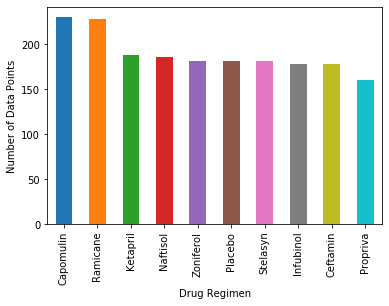

In [24]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen

#get the count of all the Drungs being tested
count = combined_df2['drug'].value_counts()
#create the bar chart with the name of the drug and the count, changed the colors to represent each drug 
axis = count.plot(kind='bar', color= ['C0', 'C1', 'C2', 'C3', 'C4', 'C5','C6','C7','C8','C9'])
#define the X label as the Drug name
axis.set_xlabel('Drug Regimen')
#define the Y label as the count of drugs
axis.set_ylabel('Number of Data Points')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

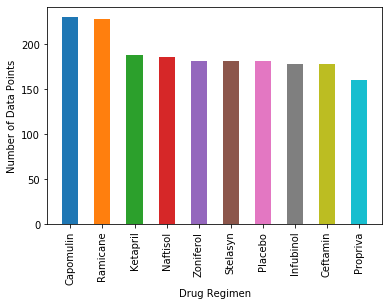

In [10]:
# Generate identical bar plot using pyplot instead of pandas.
values = combined_df2['drug'].value_counts()
labels = values.index
plt.bar(labels, values, color = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5','C6','C7','C8','C9'],
                                align="center", width=.50)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=90)


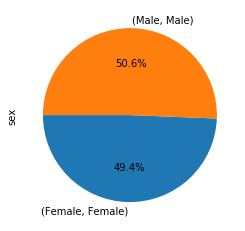

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = combined_df2.groupby('sex')
gender_count = gender_group['sex'].value_counts()


#Generate pie plot using pandas
chart = gender_count.plot(kind='pie', startangle=180, autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x7ff2d4efd510>,
 [Text(-0.021916657774508692, -1.099781642014448, 'Female'),
  Text(0.021916760743497295, 1.0997816399624576, 'Male')],
 [Text(-0.011954540604277466, -0.5998808956442442, '49.4%'),
  Text(0.01195459676918034, 0.5998808945249767, '50.6%')])

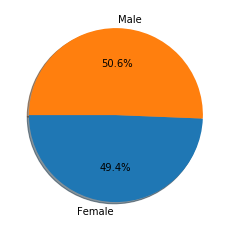

In [12]:
# Generate identical pie plot using pyplot
colors = ["tab:blue", "tab:orange"]
explode = (0,0)
genders = ["Female", "Male"]

#Generate pie plot using 
plt.pie(gender_count, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)


## Quartiles, Outliers and Boxplots

In [13]:
combined_df2

,mouse_id,drug,sex,age,weight,time,tumor,meta
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#get all the data for Capomulin drug
Capomulin = combined_df2.loc[combined_df2['drug'] == 'Capomulin']
#get all the data for Ramicane drug
Ramicane = combined_df2.loc[combined_df2['drug'] == 'Ramicane']
#get all the data for Infubinol drug
Infubinol = combined_df2.loc[combined_df2['drug'] == 'Infubinol']
#get all the data for Ceftamin drug
Ceftamin = combined_df2.loc[combined_df2['drug'] == 'Ceftamin']

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse

#Last timepoint for each mouse for Capomulin
Cap_final_time = Capomulin.groupby('mouse_id').max()['time']
Cap_final_volume = pd.DataFrame(Cap_final_time)
#Last timepoint for each mouse for Ramicane
Ram_final_time = Ramicane.groupby('mouse_id').max()['time']
Ram_final_volume = pd.DataFrame(Ram_final_time)
#Last timepoint for each mouse for Infubinol
Inf_final_time = Infubinol.groupby('mouse_id').max()['time']
Inf_final_volume = pd.DataFrame(Inf_final_time)
#Last timepoint for each mouse for Ceftamin
Cef_final_time = Ceftamin.groupby('mouse_id').max()['time']
Cef_final_volume = pd.DataFrame(Cef_final_time)

# Merge Capomulin df with the original dataframe to get the tumor volume at the last timepoint
Cap_merge = pd.merge(Cap_final_volume,combined_df2, on=('mouse_id','time'),how='left')
Cap_total_volume = Cap_merge['tumor']
# Merge Ramicane df with the original dataframe to get the tumor volume at the last timepoint
Ram_merge = pd.merge(Ram_final_volume,combined_df2, on=('mouse_id','time'),how='left')
Ram_total_volume = Ram_merge['tumor']
# Merge Infubinol df with the original dataframe to get the tumor volume at the last timepoint
Inf_merge = pd.merge(Inf_final_volume,combined_df2, on=('mouse_id','time'),how='left')
Inf_total_volume = Inf_merge['tumor']
# Merge Ceftamin df with the original dataframe to get the tumor volume at the last timepoint
Cef_merge = pd.merge(Cef_final_volume,combined_df2, on=('mouse_id','time'),how='left')
Cef_total_volume = Cef_merge['tumor']



,mouse_id,drug,sex,age,weight,time,tumor,meta
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [14]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights